# HW01 회귀

현대 중공업과 계약을 맺어 일부 선박에 대한 예측 모델을 구축하게됐습니다. 현대 중공업은 세계 최대의 선박 제조업체 중 하나로 유람선을 제작하고 있습니다.
당신은 선박에 필요한 선원 수를 정확하게 예측할 수 있도록 울산에있는 본사에 도착했습니다.
그들은 현재 새로운 선박을 건조하고 있으며 예측 모델을 만들고, 이를 사용하여 선박에 필요한 승무원 수를 예측하기를 원합니다.

지금까지의 데이터는 다음과 같습니다.

```md
Description: Measurements of ship size, capacity, crew, and age for 158 cruise
ships.


Variables/Columns
Ship Name     
Cruise Line   
Age (as of 2013)   
Tonnage (1000s of tons)   
passengers (100s)   
Length (100s of feet)  
Cabins  (100s)   
Passenger Density   
Crew  (100s)   
```
    
위 데이터는 "cruise_ship_info.csv"라는 csv 파일에 저장됩니다. 귀하의 임무는 향후 선박에 필요한 선원 수를 예측하는 데 도움이되는 회귀 모델을 만드는 것입니다. 고객은 또한 특정 크루즈 라인이 허용되는 승무원 수에 차이가 있음을 발견 했으므로 분석에 포함하는 것이 가장 중요한 기능이라고 언급했습니다!

| 종류                                       | 설명                   | 예시                                          |
| ---------------------------------------- | -------------------- | ------------------------------------------- |
| **단순 선형회귀 (Simple Linear Regression)**   | 독립변수 1개 → 종속변수 예측    | `crew ~ passengers`                         |
| **단순 선형회귀 (Simple Linear Regression)**   | 독립변수 1개 → 종속변수 예측    | `crew ~ Tonnage`                         |
| **다중 선형회귀 (Multiple Linear Regression)** | 독립변수 2개 이상 → 종속변수 예측 | `crew ~ passengers + tonnage + cruise_line` |


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [165]:
df = pd.read_csv("./data/cruise_ship_info.csv")

In [167]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [169]:
df.shape

(158, 9)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [173]:
# 필요한 컬럼만 가져오기
df = df.loc[:, ["Cruise_line", "Tonnage", "passengers", "crew"]]

In [175]:
df.head()

,Cruise_line,Tonnage,passengers,crew
0,Azamara,30.277,6.94,3.55
1,Azamara,30.277,6.94,3.55
2,Carnival,47.262,14.86,6.70
3,Carnival,110.000,29.74,19.10
4,Carnival,101.353,26.42,10.00


In [177]:
# Cruise_line 레이블 인코더 변환
le = LabelEncoder()
df["label"] = le.fit_transform(df["Cruise_line"])

In [179]:
df.head()

,Cruise_line,Tonnage,passengers,crew,label
0,Azamara,30.277,6.94,3.55,0
1,Azamara,30.277,6.94,3.55,0
2,Carnival,47.262,14.86,6.70,1
3,Carnival,110.000,29.74,19.10,1
4,Carnival,101.353,26.42,10.00,1


# 1. 선형 회귀(Linear Regression)

## (1) crew ~ tonnage

In [183]:
# 75:25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df["Tonnage"],
                                                    df["crew"],
                                                    test_size = 0.25,
                                                    random_state = 26)

x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [185]:
# 선형 회귀 모델 객체 생성
lr = LinearRegression()

In [187]:
# 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [189]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[0.09083261] 1.3762000816761084


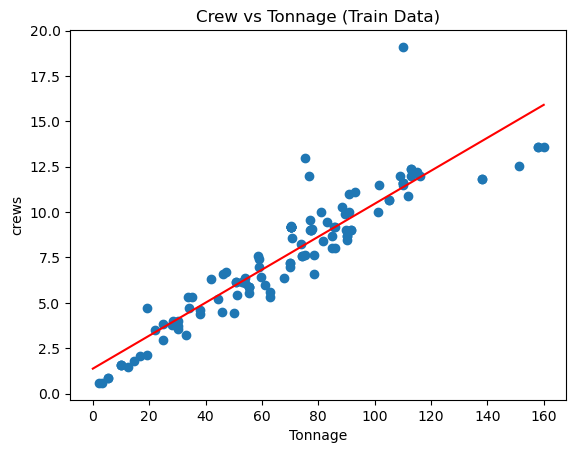

In [191]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)
plt.plot([0, 160], [lr.intercept_, 160 *  lr.coef_[0] + lr.intercept_], color = "red")

plt.title("Crew vs Tonnage (Train Data)")
plt.xlabel("Tonnage")
plt.ylabel("crews")
plt.show()

In [192]:
lr.score(x_test, y_test)

0.8738766709856282

In [193]:
pred = lr.predict(x_test)

In [194]:
mae = mean_absolute_error(y_test, pred)
mae

0.8120059391337481

In [198]:
mse = mean_squared_error(y_test, pred)
mse

1.6864845719320578

In [200]:
rmse = np.sqrt(mse)
rmse

1.2986472084180745

## (2) crew ~ passengers

In [204]:
# 75:25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df["passengers"],
                                                    df["crew"],
                                                    test_size = 0.25,
                                                    random_state = 26)

x_train = np.reshape(x_train.values, (-1, 1))
x_test = np.reshape(x_test.values, (-1, 1))

In [206]:
# 선형 회귀 모델 객체 생성
lr = LinearRegression()

In [208]:
# 모델 훈련
lr.fit(x_train, y_train)

LinearRegression()

In [210]:
# 계수(coefficient), y절편
print(lr.coef_, lr.intercept_)

[0.33374884] 1.6624380122812745


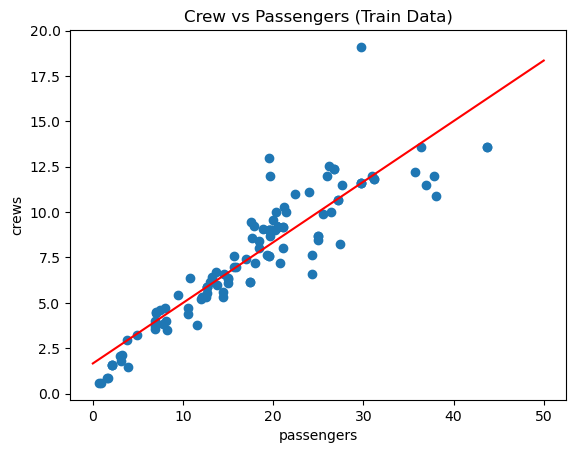

In [212]:
# 훈련 데이터와 회귀선 시각화
plt.figure()

plt.scatter(x_train, y_train)   
plt.plot([0, 50], [lr.intercept_, 50 *  lr.coef_[0] + lr.intercept_], color = "red", label='Regression line')

plt.title("Crew vs Passengers (Train Data)")
plt.xlabel("passengers")
plt.ylabel("crews")
plt.show()

In [213]:
lr.score(x_test, y_test)

0.8584996198440943

In [216]:
pred = lr.predict(x_test)

In [218]:
mae = mean_absolute_error(y_test, pred)
mae

0.9967659651367373

In [220]:
mse = mean_squared_error(y_test, pred)
mse

1.8921020394907515

In [222]:
rmse = np.sqrt(mse)
rmse

1.3755370004077503

# 2. 다항 회귀

In [225]:
# Tonnage 제곱 컬럼 추가
df["Tonnage_squared"] = df["Tonnage"] ** 2

In [227]:
df.head()

,Cruise_line,Tonnage,passengers,crew,label,Tonnage_squared
0,Azamara,30.277,6.94,3.55,0,916.696729
1,Azamara,30.277,6.94,3.55,0,916.696729
2,Carnival,47.262,14.86,6.70,1,2233.696644
3,Carnival,110.000,29.74,19.10,1,12100.000000
4,Carnival,101.353,26.42,10.00,1,10272.430609


In [229]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df[["Tonnage", "Tonnage_squared"]],
                                                    df["crew"],
                                                    test_size = 0.25,
                                                    random_state = 26)

In [231]:
x_train.shape

(118, 2)

In [233]:
# 모델 객체 생성
lr = LinearRegression()

In [235]:
# 모델 학습
lr.fit(x_train, y_train)

LinearRegression()

In [237]:
# 결정계수
lr.score(x_test, y_test)

0.837958001336069

In [239]:
pred = lr.predict(x_test)

In [241]:
mae = mean_absolute_error(y_test, pred)
mae

0.7939793963351275

In [243]:
mse = mean_squared_error(y_test, pred)
mse

2.166778603826848

In [245]:
print(lr.coef_, lr.intercept_)

[ 0.13718302 -0.0003163 ] 0.0666092869003494


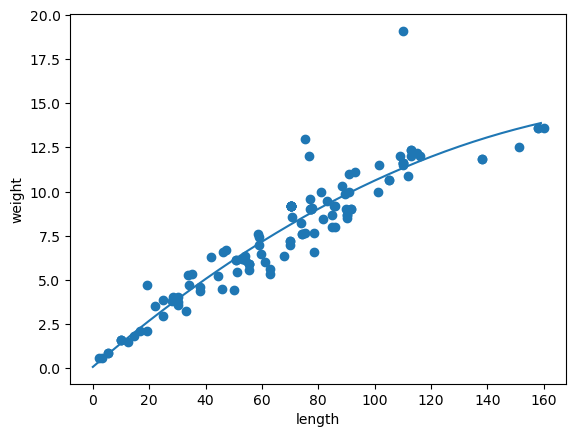

In [247]:
# 다항회귀 시각화
points = np.arange(160)

plt.scatter(x_train["Tonnage"], y_train)    # 훈련 데이터
plt.plot(points, 0.13718302 * points + (points ** 2) * -0.0003163 + 0.0666092869003494)    # 회귀식

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 3. 다중 회귀

In [250]:
x = df[["Tonnage", "passengers", "label"]]
y = df["crew"]

In [252]:
# 75 : 25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 26)

In [254]:
x_train.shape

(118, 3)

In [256]:
lr = LinearRegression()

In [258]:
lr.fit(x_train, y_train)

LinearRegression()

In [260]:
pred = lr.predict(x_test)

In [262]:
mae = mean_absolute_error(y_test, pred)
mae

0.7262808478709528

In [264]:
mse = mean_squared_error(y_test, pred)
mse

1.5111821917659163